In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

import Anomaly_Analysis_helper as aa

FileNotFoundError: [Errno 2] No such file or directory: 'test_set.csv'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('mid_cap_all_sectors_ret.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]
# test_data.to_csv('test_set.csv', index=True)

In [2]:
anomalies_lstm = pd.read_csv('Anomaly_Dataset/lstm.csv', index_col='date', parse_dates=True)
anomalies_cnn = pd.read_csv('Anomaly_Dataset/cnn.csv', index_col='date', parse_dates=True)
anomalies_isoforest = pd.read_csv('Anomaly_Dataset/isolation_forest.csv', index_col='date', parse_dates=True)
anomalies_knn = pd.read_csv('Anomaly_Dataset/KNN.csv', index_col='date', parse_dates=True)
anomalies_statistical = pd.read_csv('Anomaly_Dataset/statistics.csv', index_col='date', parse_dates=True)
anomalies_mahalanobis = pd.read_csv('Anomaly_Dataset/mahalanobis_distance.csv', index_col='date', parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Anomaly_Dataset/lstm.csv'

In [5]:
dates_match = (
    anomalies_lstm.index.equals(anomalies_cnn.index) and
    anomalies_lstm.index.equals(anomalies_knn.index) and
    anomalies_lstm.index.equals(anomalies_isoforest.index) and
    anomalies_lstm.index.equals(anomalies_statistical.index) and
    anomalies_lstm.index.equals(anomalies_mahalanobis.index)
)
print(f"Do all datasets have matching dates? {dates_match}")

columns_match = (
    anomalies_lstm.columns.equals(anomalies_cnn.columns) and
    anomalies_lstm.columns.equals(anomalies_knn.columns) and
    anomalies_lstm.columns.equals(anomalies_isoforest.columns) and
    anomalies_lstm.columns.equals(anomalies_statistical.columns) and
    anomalies_lstm.columns.equals(anomalies_mahalanobis.columns)
)
print(f"Do all datasets have matching sectors? {columns_match}")

Do all datasets have matching dates? True
Do all datasets have matching sectors? True


In [6]:
# combining dataset
anomalies_dict = {
    'LSTM': anomalies_lstm,
    'CNN': anomalies_cnn,
    'KNN': anomalies_knn,
    'IsolationForest': anomalies_isoforest,
    'Statistical': anomalies_statistical,
    'Mahalanobis': anomalies_mahalanobis
}

anomalies_combined = pd.concat(anomalies_dict, axis=1)

Anomalies Count per Sector and Model: 
                        LSTM  CNN  KNN  IsolationForest  Statistical  \
Materials                 76   20   86               39           57   
Industrials              107   56  100               47           55   
Health Care               93   59   33               17           52   
Real Estate               37   42   87               52           53   
Consumer Discretionary   103  163   57               59           50   
Financials                51   74  118               75           62   
Utilities                 97   74   82               68           60   
Information Technology   116   70   73               14           64   
Energy                    89   56   29               83           68   
Consumer Staples          36   70   10               17           61   
Communication Services    68   71   42               10           67   

                        Mahalanobis  
Materials                        17  
Industrials         

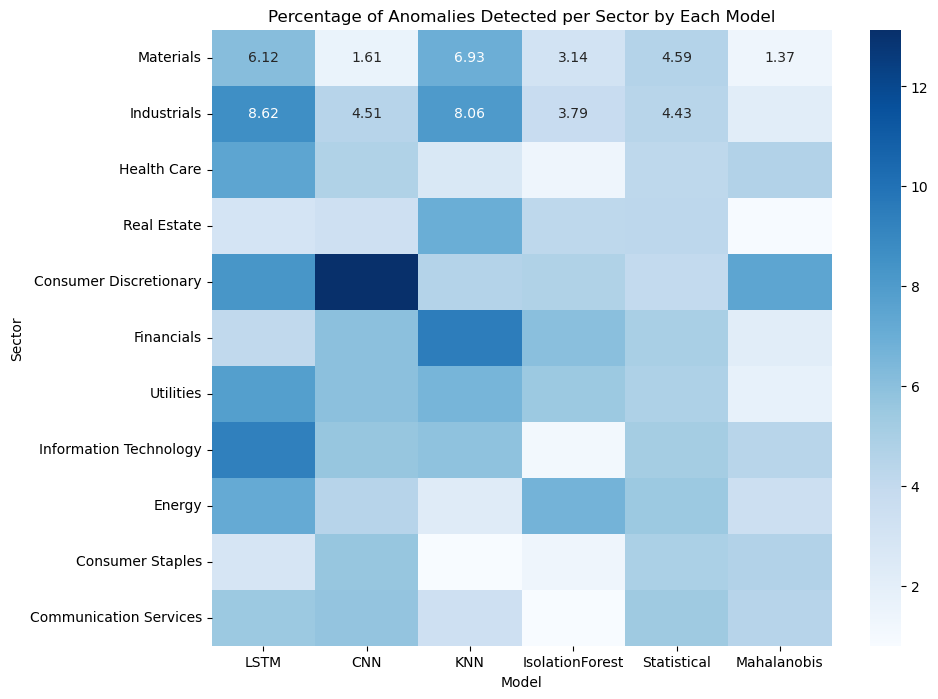

In [7]:
anomaly_counts, anomaly_percentage = aa.summarize_anomalies(anomalies_dict, print_info=True, plot=True)

In [8]:
anomaly_counts.mean()

LSTM               79.363636
CNN                68.636364
KNN                65.181818
IsolationForest    43.727273
Statistical        59.000000
Mahalanobis        42.545455
dtype: float64

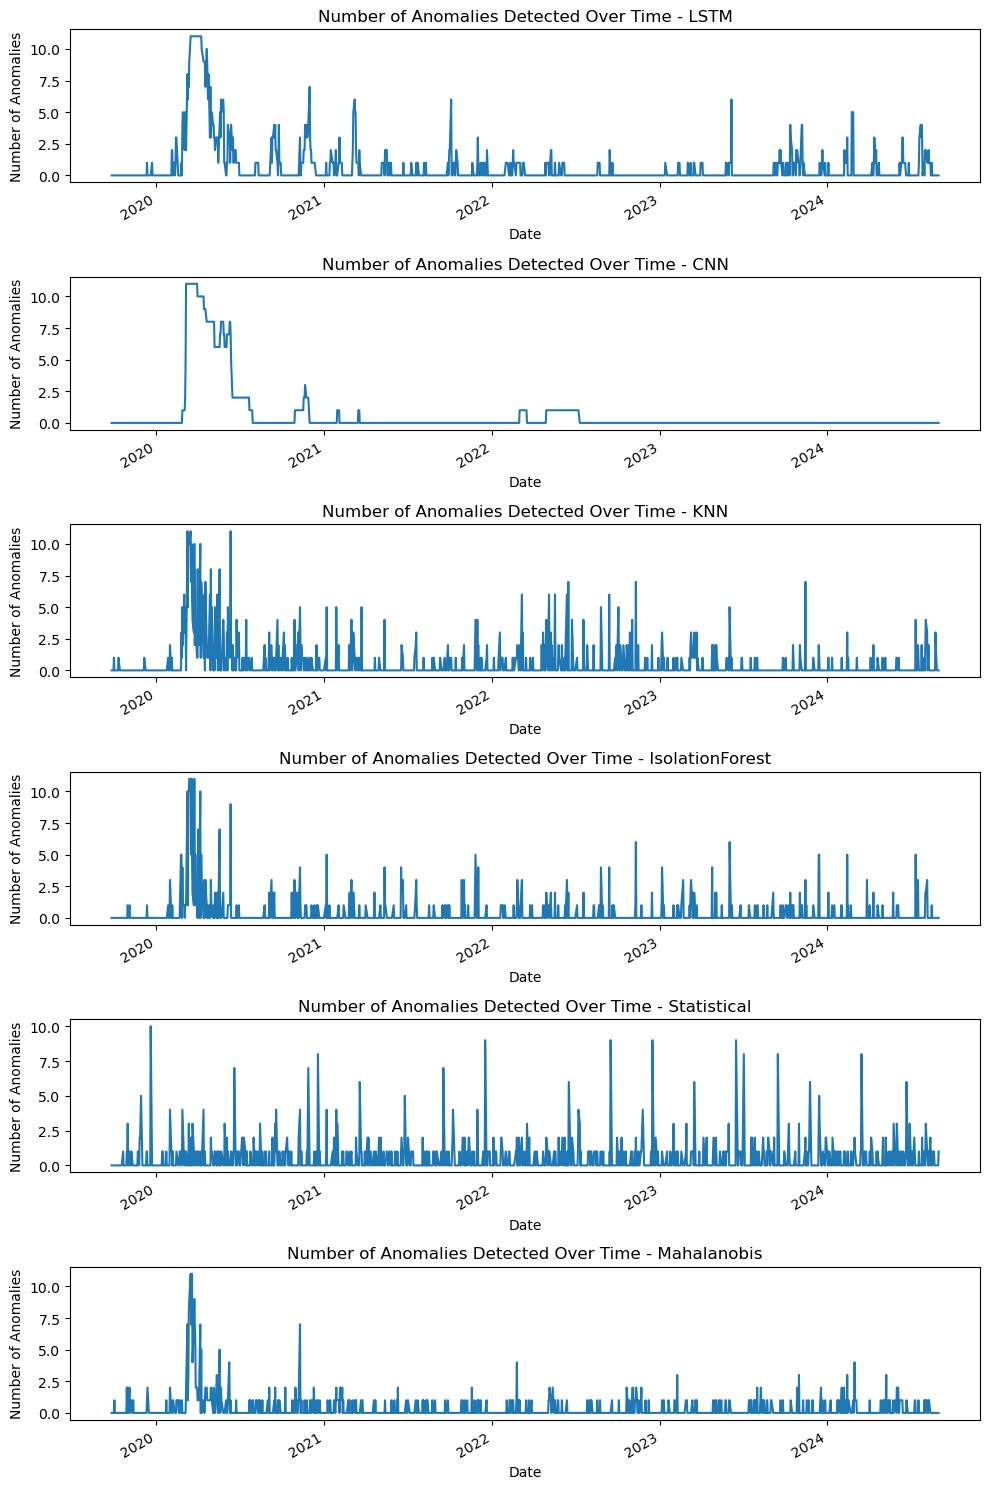

In [9]:
aa.plot_anomaly_distribution(anomalies_dict)

Jaccard Similarity Index Between Models:


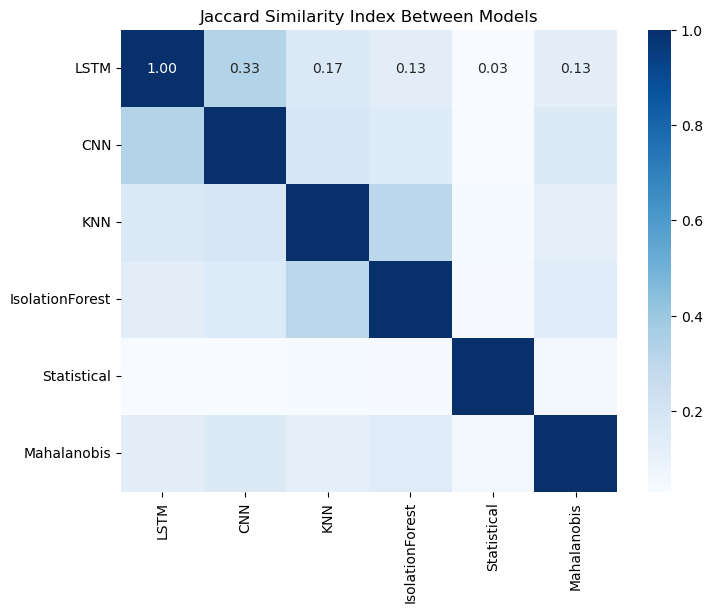

In [10]:
aa.get_jaccard(anomalies_dict)

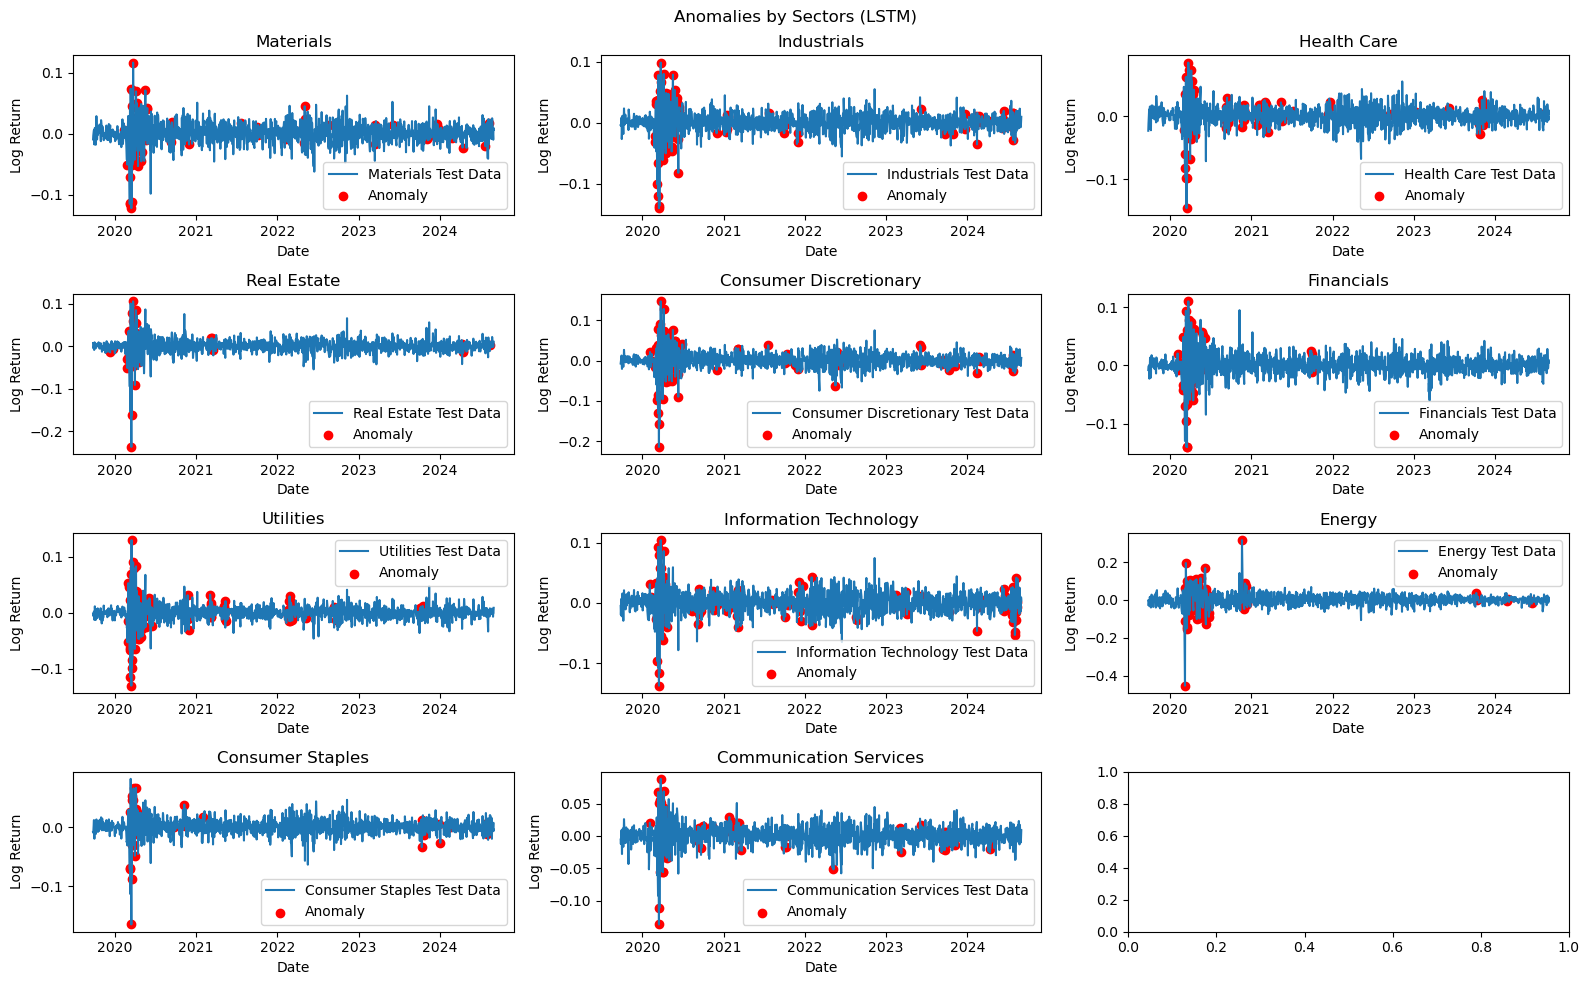

In [11]:
aa.plot_anomalies(anomalies_dict,'LSTM')

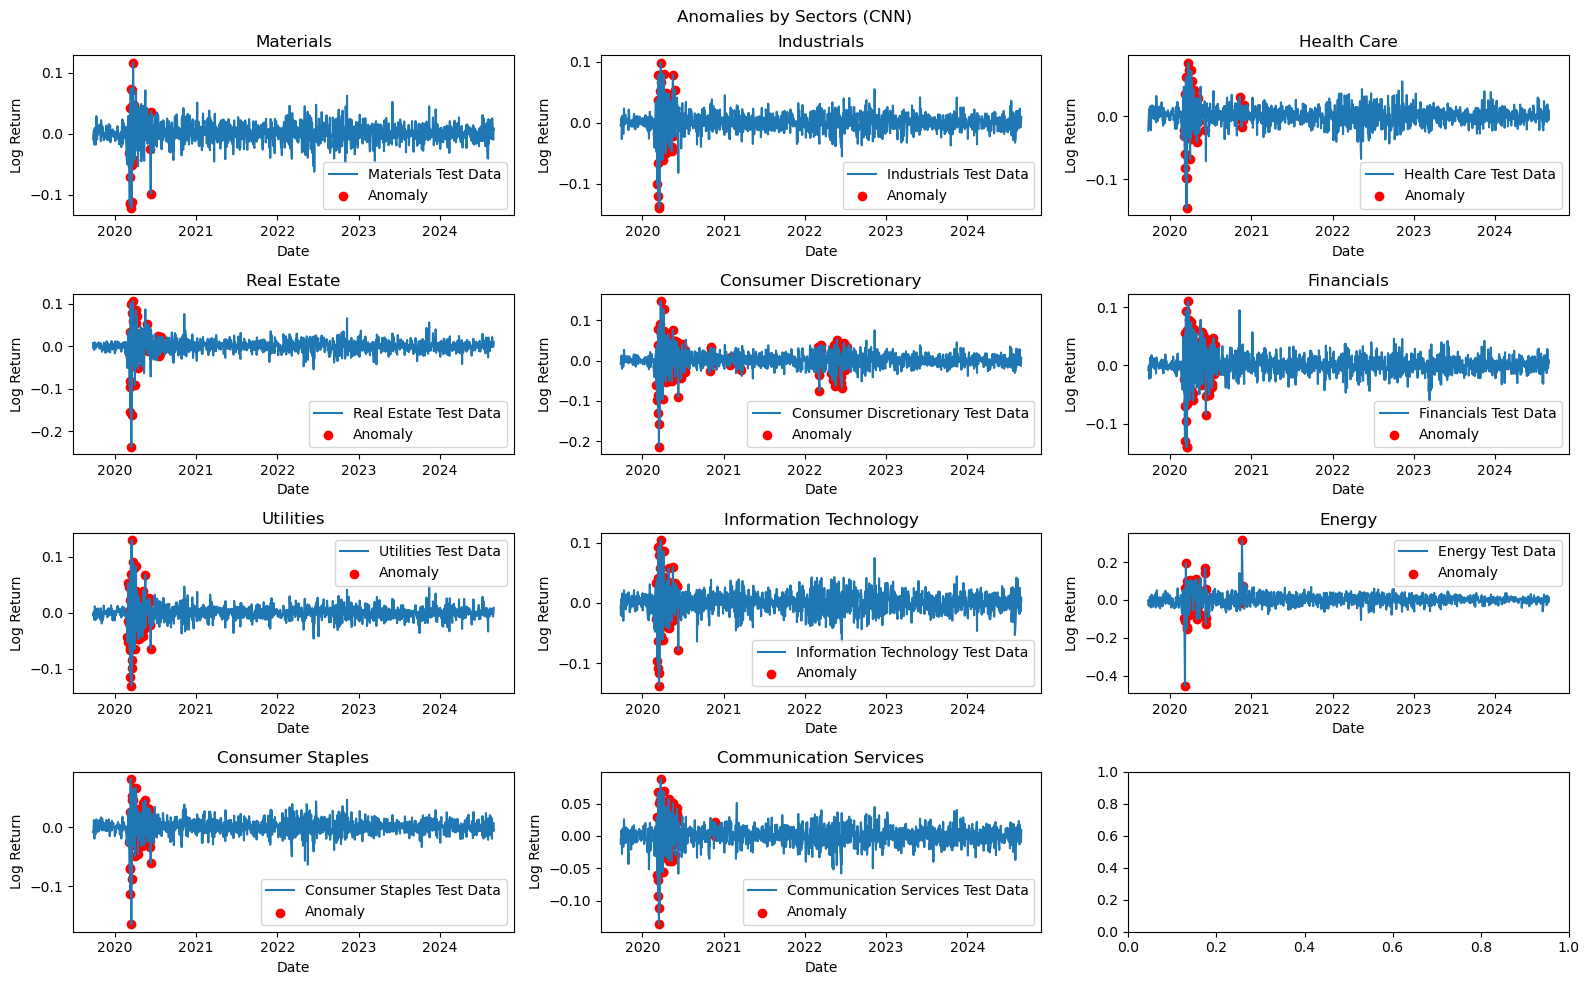

In [12]:
aa.plot_anomalies(anomalies_dict,'CNN')

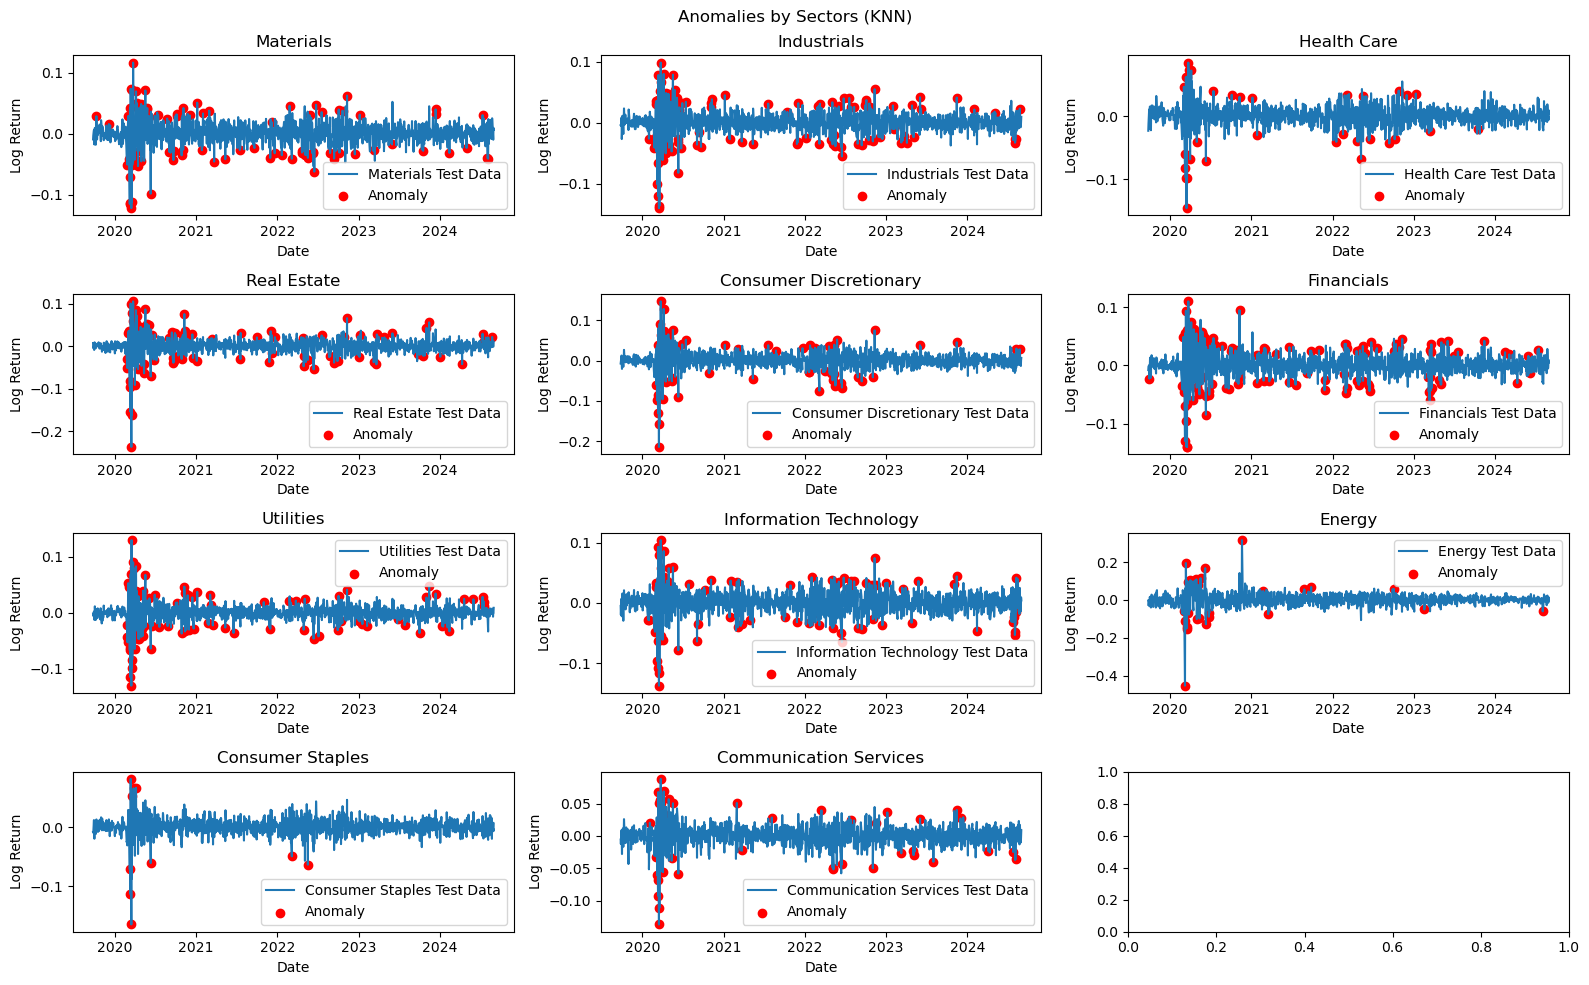

In [13]:
aa.plot_anomalies(anomalies_dict,'KNN')

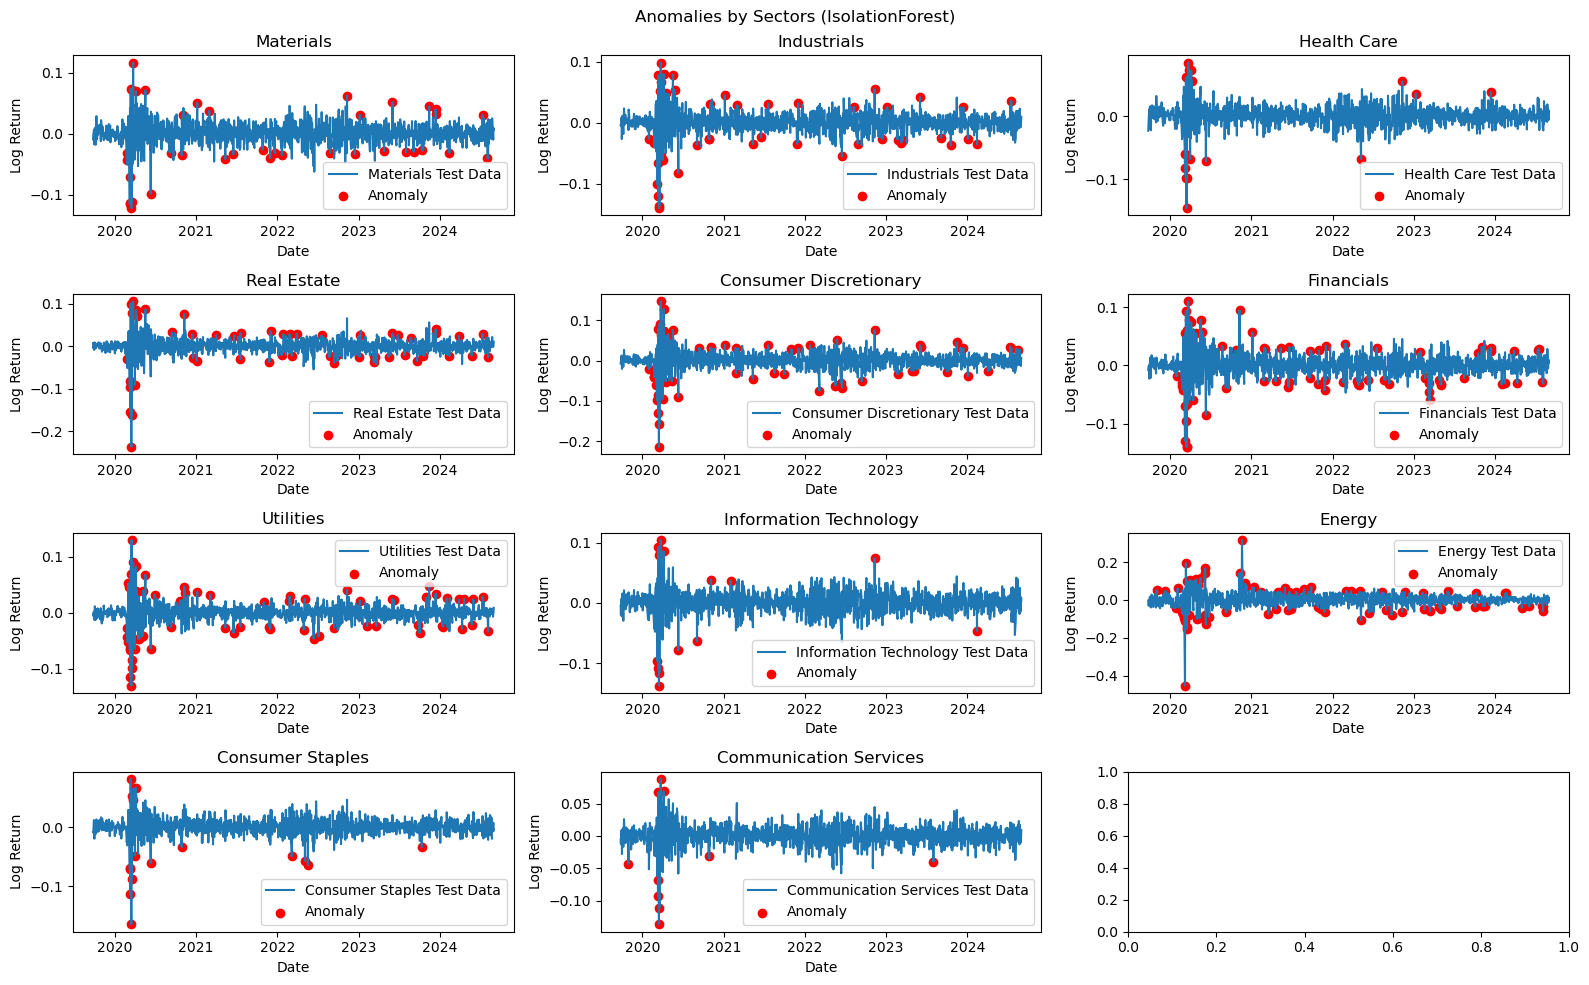

In [14]:
aa.plot_anomalies(anomalies_dict,'IsolationForest')

KeyboardInterrupt: 

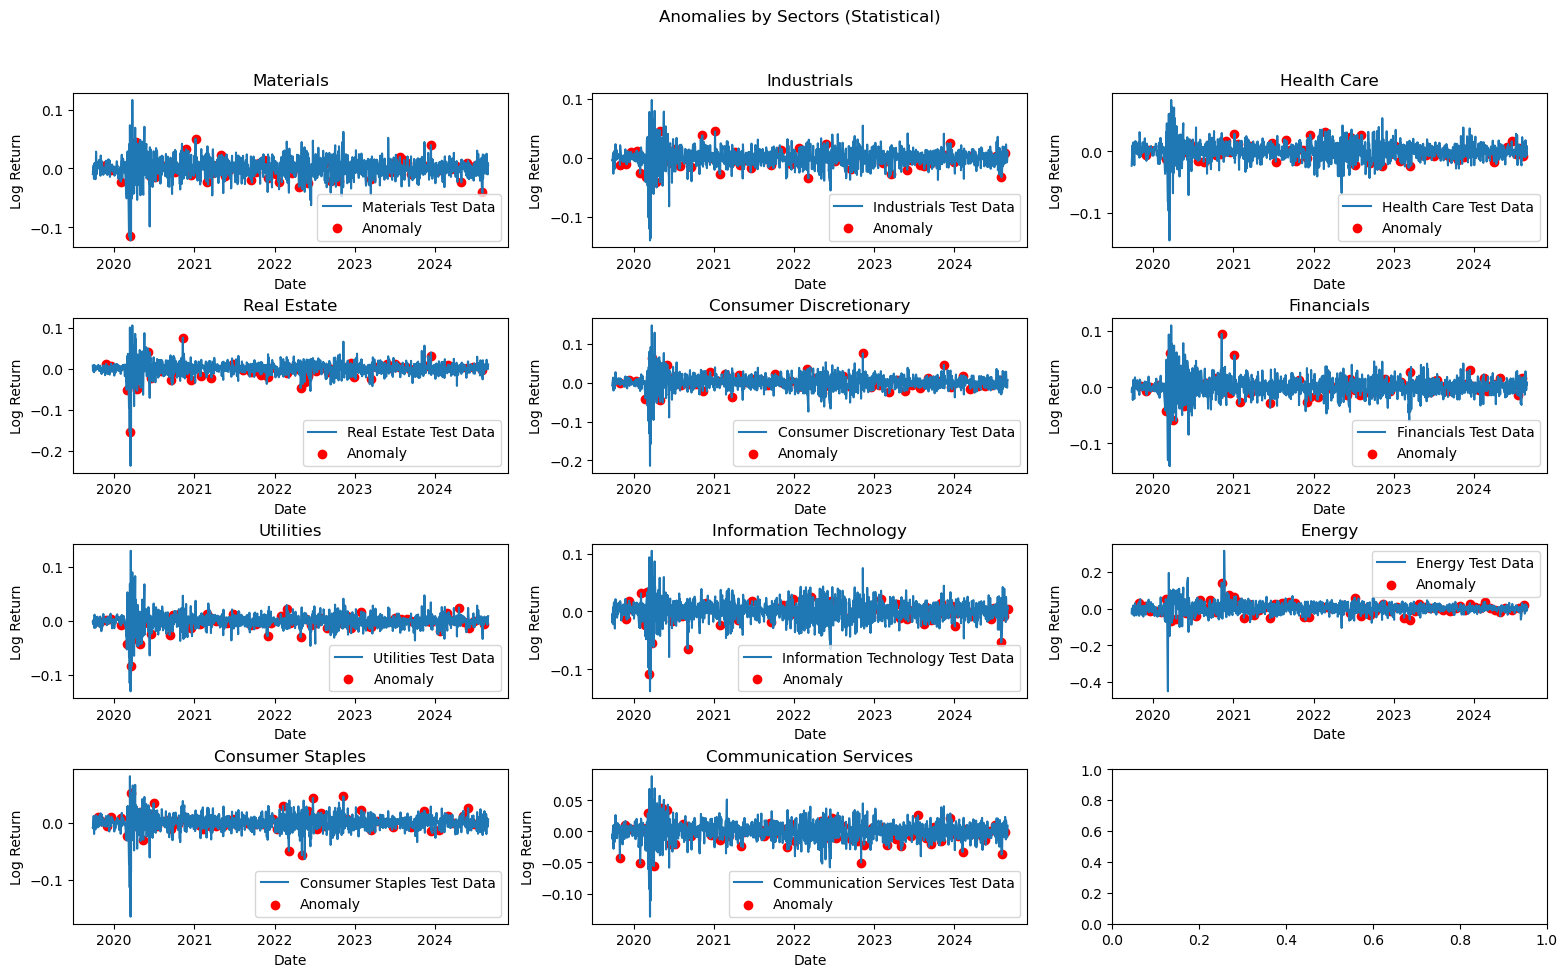

In [15]:
aa.plot_anomalies(anomalies_dict,'Statistical')

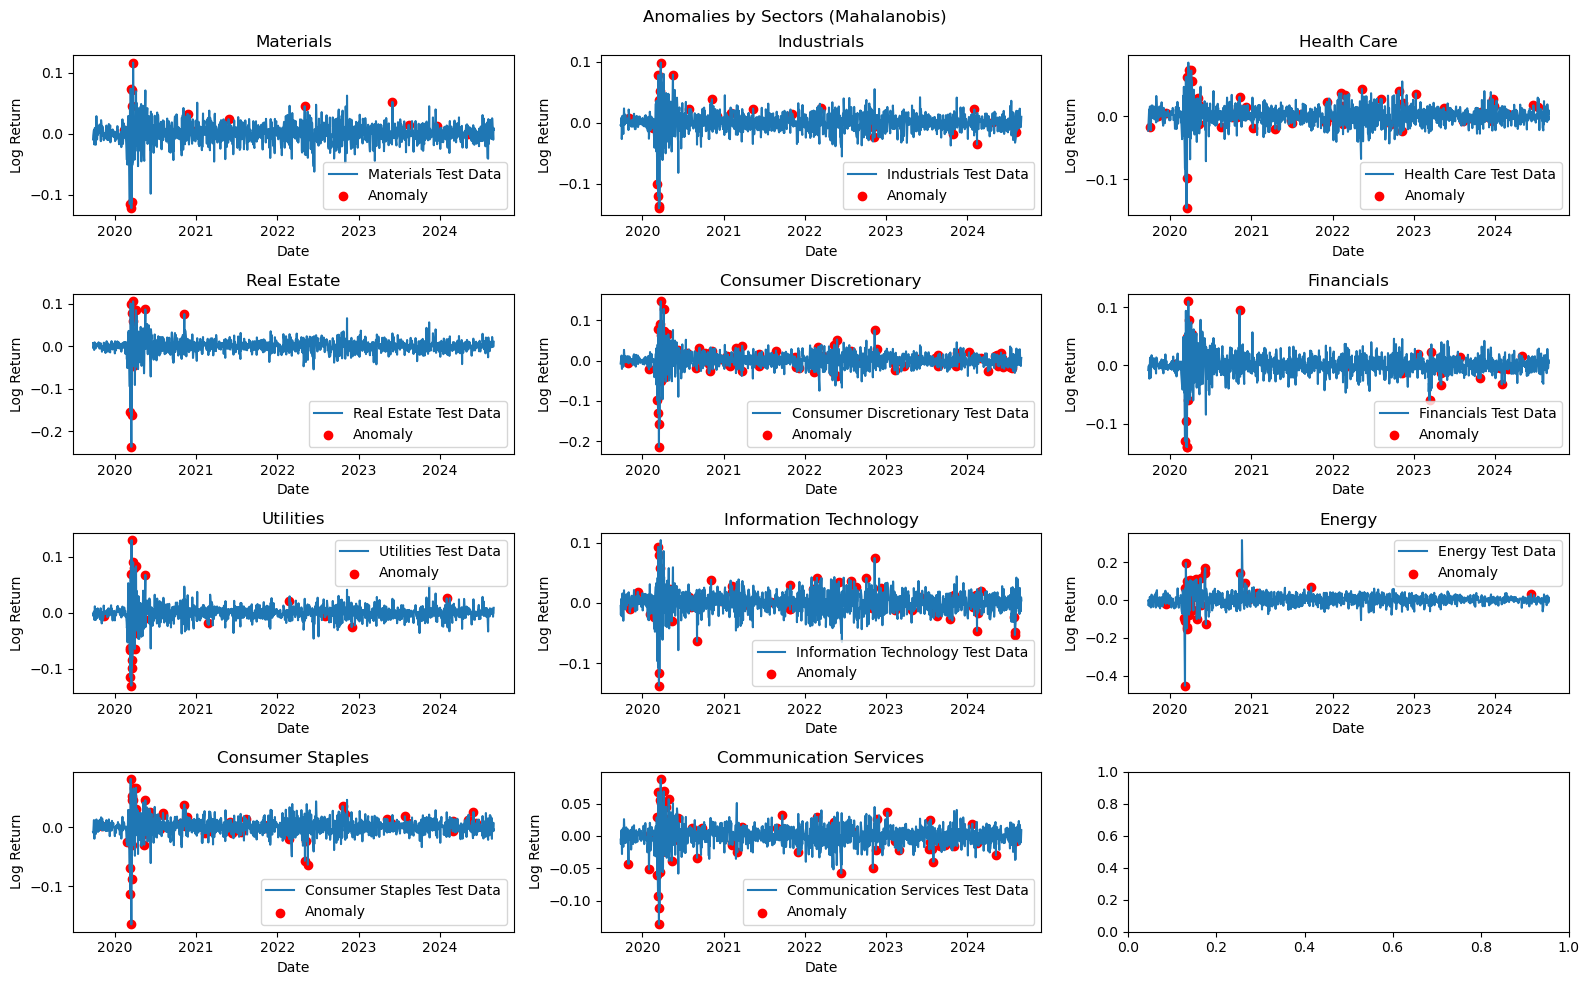

In [ ]:
aa.plot_anomalies(anomalies_dict,'Mahalanobis')

Getting Consensus Anomalies for Models:  ['LSTM', 'KNN']


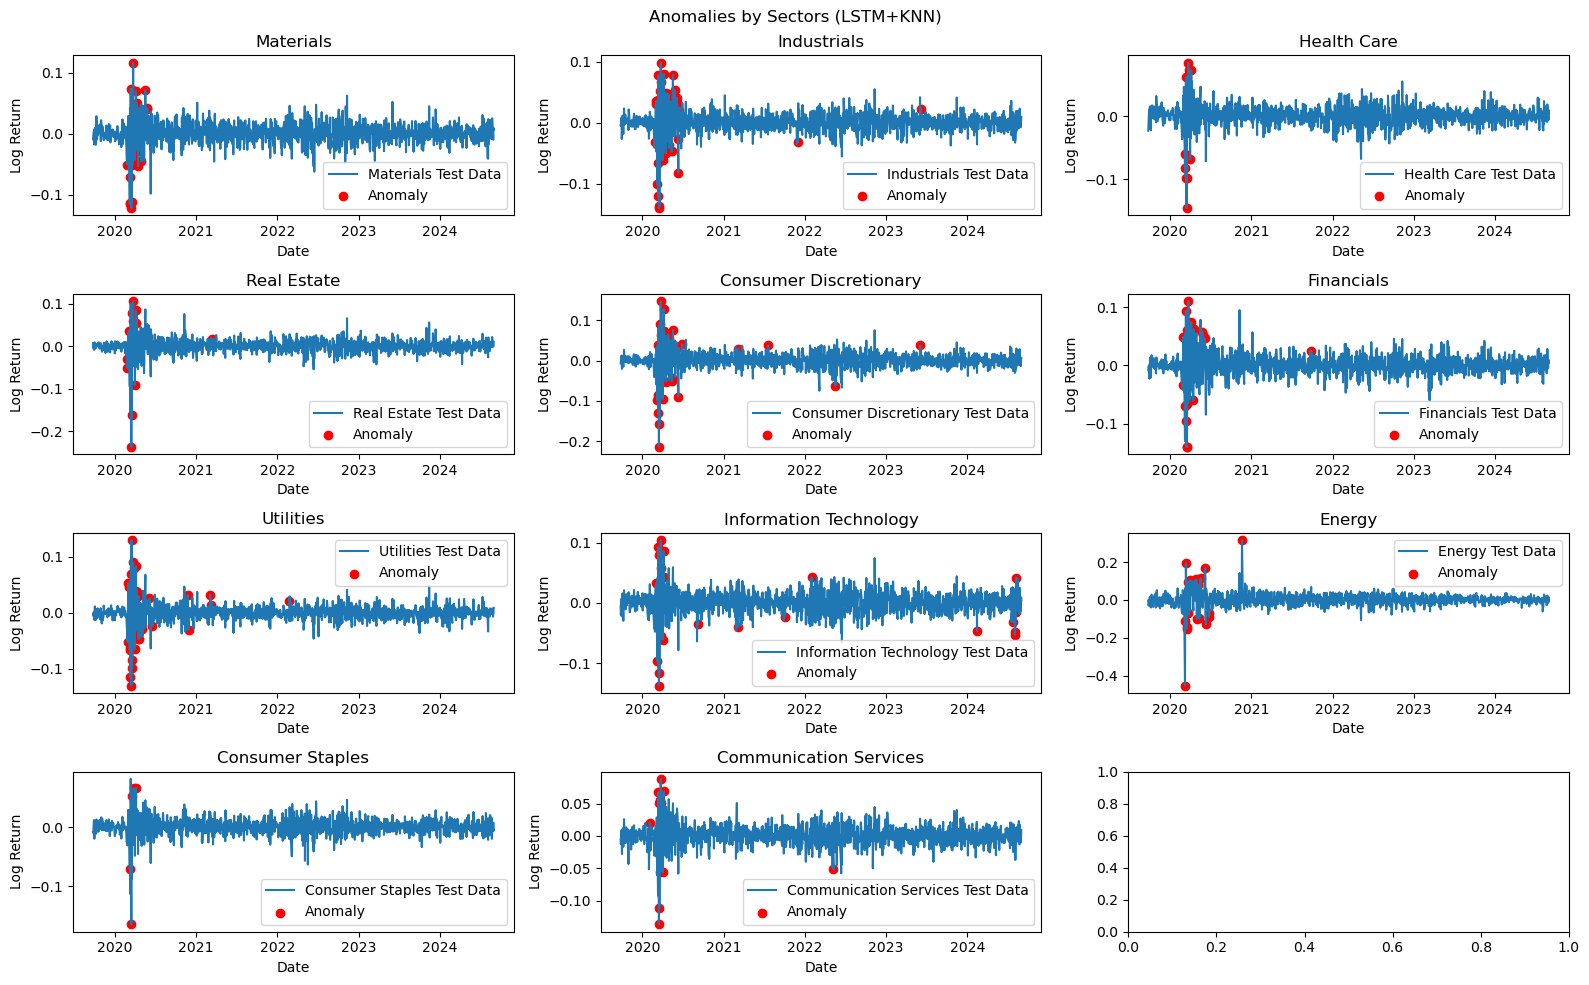

In [ ]:
model_list = ['LSTM', 'KNN']
sector_anomaly_consensus = aa.anomalies_consensus(anomalies_dict, model_list, plot=True)

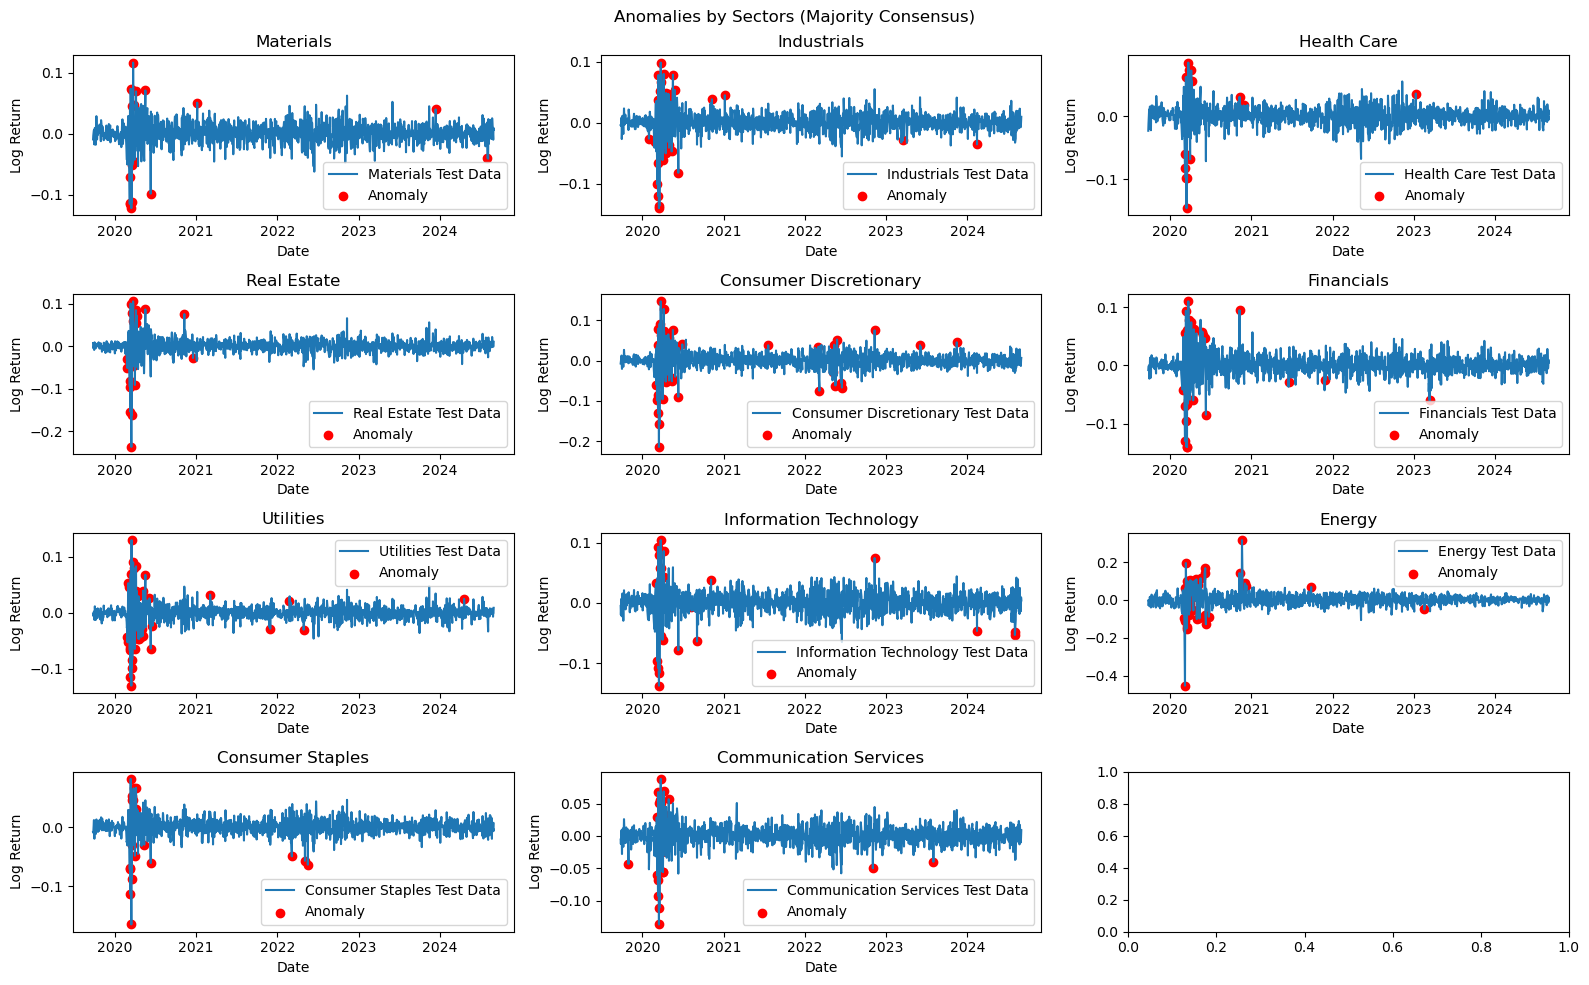

In [ ]:
majority_anomaly_consensus = aa.majority_anomalies_consensus(anomalies_dict, consensus_threshold = 3, plot = True)

In [ ]:
majority_anomaly_consensus.sum()

Materials                 18
Industrials               38
Health Care               20
Real Estate               21
Consumer Discretionary    44
Financials                29
Utilities                 40
Information Technology    22
Energy                    45
Consumer Staples          22
Communication Services    23
dtype: int64

In [ ]:
# Get the dates for anomalies by sector
consensus_anomaly_dates = aa.anomaly_dates(majority_anomaly_consensus)

- Period Analysis (Sector Specific): 一个sector中连续几天(3)发生anomaly or 一个sector中只要5天内有anomaly就继续，然后直到anomaly不再出现，算为一个period   
- Time Analysis (Across Sector, Macro): Combine Sectors anomalies dates. See if there's a period where all sector has anomaly. Indication of macro event. 
- Sector Specific Analysis: Singular anomaly points. Sector specific. Look into particular sector news on the date. 

In [ ]:
# Get the anomaly Period by sector
sector_anomaly_period = aa.anomaly_period(majority_anomaly_consensus)

In [ ]:
sector_anomaly_period['Consumer Staples']

[(Timestamp('2020-03-09 00:00:00'), Timestamp('2020-04-08 00:00:00')),
 (Timestamp('2020-05-13 00:00:00'), Timestamp('2020-05-13 00:00:00')),
 (Timestamp('2020-06-11 00:00:00'), Timestamp('2020-06-11 00:00:00')),
 (Timestamp('2022-03-07 00:00:00'), Timestamp('2022-03-07 00:00:00')),
 (Timestamp('2022-05-05 00:00:00'), Timestamp('2022-05-05 00:00:00')),
 (Timestamp('2022-05-18 00:00:00'), Timestamp('2022-05-18 00:00:00'))]

In [ ]:
sector_anomaly_period['Consumer Discretionary']

[(Timestamp('2020-03-05 00:00:00'), Timestamp('2020-04-17 00:00:00')),
 (Timestamp('2020-04-27 00:00:00'), Timestamp('2020-05-01 00:00:00')),
 (Timestamp('2020-05-12 00:00:00'), Timestamp('2020-05-18 00:00:00')),
 (Timestamp('2020-06-05 00:00:00'), Timestamp('2020-06-11 00:00:00')),
 (Timestamp('2020-06-29 00:00:00'), Timestamp('2020-06-29 00:00:00')),
 (Timestamp('2021-07-20 00:00:00'), Timestamp('2021-07-20 00:00:00')),
 (Timestamp('2022-03-02 00:00:00'), Timestamp('2022-03-07 00:00:00')),
 (Timestamp('2022-05-06 00:00:00'), Timestamp('2022-05-25 00:00:00')),
 (Timestamp('2022-06-13 00:00:00'), Timestamp('2022-06-16 00:00:00')),
 (Timestamp('2022-11-10 00:00:00'), Timestamp('2022-11-10 00:00:00')),
 (Timestamp('2023-06-02 00:00:00'), Timestamp('2023-06-02 00:00:00')),
 (Timestamp('2023-11-14 00:00:00'), Timestamp('2023-11-14 00:00:00'))]

In [ ]:
macro_anomaly_periods = aa.macro_anomalies_period(majority_anomaly_consensus)

print('Macro-Economic Anomaly Periods:')
for i in range(len(macro_anomaly_periods)):
    print(f'- {macro_anomaly_periods[i][0]} to {macro_anomaly_periods[i][1]}')

Macro-Economic Anomaly Periods:
- 2020-03-09 00:00:00 to 2020-04-08 00:00:00
- 2020-06-11 00:00:00 to 2020-06-11 00:00:00


In [ ]:
sector_specific_periods = aa.sector_specific_period(sector_anomaly_period, macro_anomaly_periods)

{'Materials': [(Timestamp('2020-05-18 00:00:00'),
   Timestamp('2020-05-18 00:00:00')),
  (Timestamp('2021-01-06 00:00:00'), Timestamp('2021-01-06 00:00:00')),
  (Timestamp('2023-12-13 00:00:00'), Timestamp('2023-12-13 00:00:00')),
  (Timestamp('2024-08-02 00:00:00'), Timestamp('2024-08-02 00:00:00'))],
 'Industrials': [(Timestamp('2020-01-31 00:00:00'),
   Timestamp('2020-01-31 00:00:00')),
  (Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-27 00:00:00')),
  (Timestamp('2020-04-08 00:00:00'), Timestamp('2020-05-26 00:00:00')),
  (Timestamp('2020-11-09 00:00:00'), Timestamp('2020-11-09 00:00:00')),
  (Timestamp('2021-01-06 00:00:00'), Timestamp('2021-01-06 00:00:00')),
  (Timestamp('2023-03-17 00:00:00'), Timestamp('2023-03-17 00:00:00')),
  (Timestamp('2024-02-13 00:00:00'), Timestamp('2024-02-13 00:00:00'))],
 'Health Care': [(Timestamp('2020-04-08 00:00:00'),
   Timestamp('2020-04-20 00:00:00')),
  (Timestamp('2020-09-16 00:00:00'), Timestamp('2020-09-16 00:00:00')),
  (Timesta